# AI4GSD Demo
------------------------------------------
## Drone Videos
------------------------------------------
#### Table of contents
#### 0. Installing requried packages (please restart the kernel after installation)
#### 1. Importing required packages
#### 2. Defining working directory
#### 3. Extracting or copying your videos/photos to desired folder
#### 4. Obtaining scales from AI, drone flight data, or manual measurements
#### 5. Obtaining segmentation of anthropogenic objects
#### 6. Obtaining grain size data
#### 7. Applying quality control

##### *** Please contact Yunxiang Chen, yunxiang.chen@pnnl.gov for reporting errors

------------------------------------------
### 0. Installing requried packages (please restart the kernel after installation)

In [1]:
#!pip install --user natsort
#!pip install --user ismember

### 1. Importing required packages

In [2]:
import os, sys
sys.path.append(os.path.dirname(os.getcwd()))
import AI4GSD

### 2. Defining working directory

In [3]:
WorkDir = os.path.dirname(os.getcwd())
foldername = '20241130_YC_DroneVideoFieldTest'                             # Parent folder where you save photos/videos.
PhotoDir = WorkDir + os.sep + 'Demo_Data' + os.sep + foldername                

### 3. Extracting or copying your videos/photos to desired folder

In [4]:
AI4GSD.getPhotos(PhotoDir,nframe=2000, overwrite=False)                   # Use once.

Cuts photos output folder: /home/chen200/Computation/Python/work/Mine/SFA/AI4GSD/Demo_Data/20241130_YC_DroneVideoFieldTest/
Video photo output folder: /home/chen200/Computation/Python/work/Mine/SFA/AI4GSD/Demo_Data/20241130_YC_DroneVideoFieldTest
Cutting DJI_0113.MOV: to size 1280(w) * 1280(h) every 2000 frames.
DJI_0113.MOV: get frame 1 from 2000/5759 in 4.35 s (34.73%)
DJI_0113.MOV: get frame 2 from 4000/5759 in 3.95 s (69.46%)

Computation done, elapsed time 8.93 seconds.




### 4. Obtaining scales from AI, drone flight data, or manual measurements

In [5]:
PP = AI4GSD.parameters()
PP.Directory = PhotoDir
PP.OverWriteAll = True                                                     # Overwrite everything if True.
PP.Directory = PhotoDir
PP.OverWriteScaleFile = True
PP.OverWriteScaleRows = True
PP.ScaleSource = 'log'                                                     # Use drone log option.
PP.ModelName = 'YOLO11m.1280.20250825'                                     # Which AI to use.
PP.ComputingSource = 'local'                                               # What computing resource to use.
PP.ImageSizeFactor = 1                                                     # Do you need to user a larger image size for inference?
PP.ConfidenceThreshold = 0.85                                              # Minimum confidence threshold.
PP.YOLOSave = False                                                        # Need to save AI prediction to folder.
scales =  AI4GSD.metadata(PP)

Generating scale file for: 20241130_YC_DroneVideoFieldTest
Reading DJI flight logs from files
1/2: photo 1/2, DJI_0113_2000.png, scale log, res 0.59 mm/px, status -1, (50.00%), 0.59 s
2/2: photo 2/2, DJI_0113_4000.png, scale log, res 0.73 mm/px, status -1, (100.00%), 0.43 s
Total time: 1.05 s, time per photo 0.52 s
-----------------------------------------------------------------



### 5. Obtaining segmentation of anthropogenic objects

In [6]:
PP = AI4GSD.parameters()
PP.Directory = PhotoDir
PP.FolderLevel = 'L1'
PP.ModelName = 'YOLO11m.640.20250906'
PP.ObjectName = 'anthro'
PP.OverWriteSegementation = True
PP.YOLOSave = False
PP.YOLOIOU = 0.45
PP.ComputingSource = 'local'
PP.ImageSizeType = 'default'
PP.ImageSizeFactor=1
PP.SegmentationClassName = ['board','redbag','people']                     # What object class need to track.
AI4GSD.background(PP)

-----------------------------------------------------------------
Folder name: 20241130_YC_DroneVideoFieldTest
output name: segments
Model name: YOLO11m.640.20250906 from local for anthro
Model layer: 125, model parmeter: 22.37M, submodule number: 445
IOU: 0.45, user confidence: 0.35
Number of photos: 2, number of exluded photos 0
20241130_YC_DroneVideoFieldTest: 1/2, DJI_0113_2000.png, no objects (50.00%)
20241130_YC_DroneVideoFieldTest: 2/2, DJI_0113_4000.png, no objects (100.00%)
Total time: 3.42 s, time per photo 1.71 s
-----------------------------------------------------------------



### 6. Obtaining grain size data

AI4GSD: an AI and cloud powered tool for grain size quantification
AI models in use: YOLO11m.1280.20250322
Confidence thresholds in use: 0.35

-----------------------------------------------------------------
Folder name: 20241130_YC_DroneVideoFieldTest
Output folder: 20241130_YC_DroneVideoFieldTest_YOLO11m.1280.20250322_35
Model name: YOLO11m.1280.20250322 from local for rock detection
Model layer: 113, model parmeter: 20.05M, submodule number: 409
IOU: 0.45, YOLO confidence: 0.25, user confidence: 0.35
Number of photos: 2, number of exluded photos 0
1/2: DJI_0113_2000.png, resolution 0.59 mm/px (50.00%), 0.00 s
Detected 70 rocks, diagonal and count based D10, D50, D60, and D84 are: 5.55, 13.70, 16.34, and 28.19 cm
Detected 70 rocks, diagonal and area  based D10, D50, D60, and D84 are: 13.70, 32.18, 38.49, and 48.54 cm


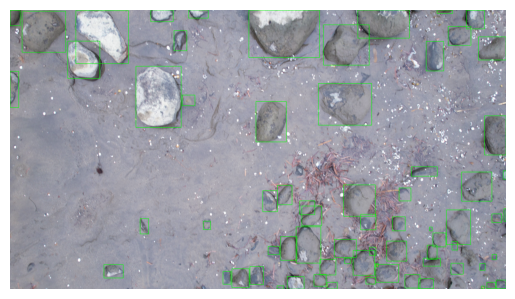

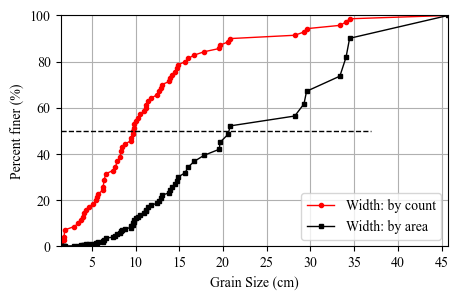

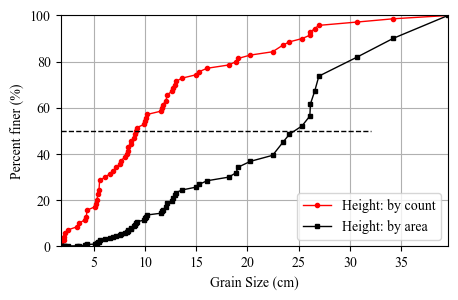

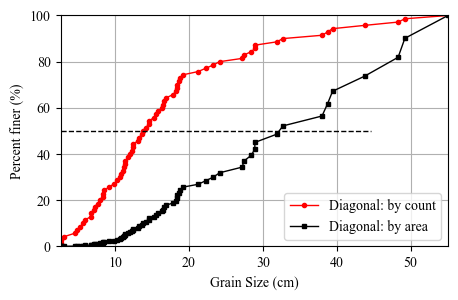

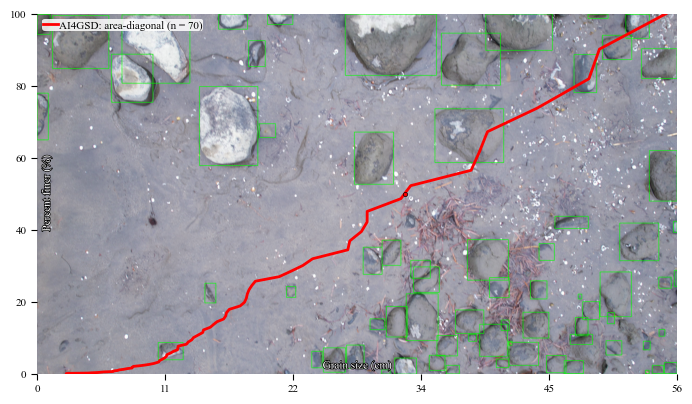

2/2: DJI_0113_4000.png, resolution 0.73 mm/px (100.00%), 7.75 s
Detected 3099 rocks, diagonal and count based D10, D50, D60, and D84 are: 3.36, 4.54, 4.85, and 6.25 cm
Detected 3099 rocks, diagonal and area  based D10, D50, D60, and D84 are: 3.84, 5.86, 6.66, and 11.55 cm


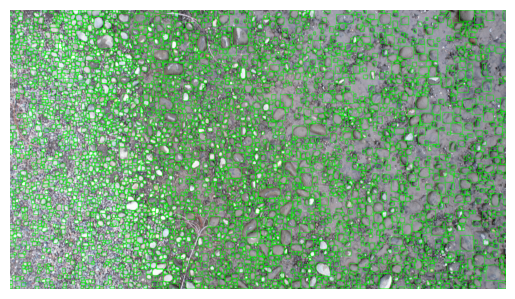

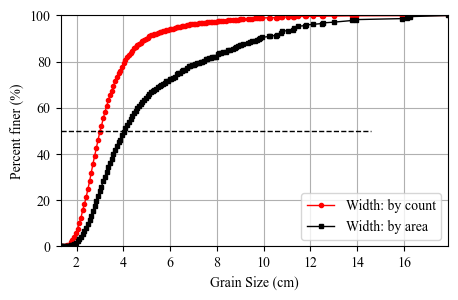

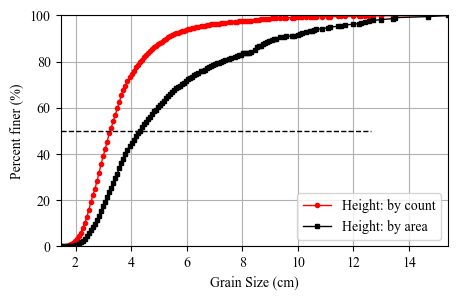

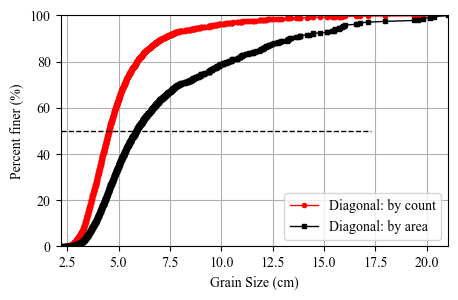

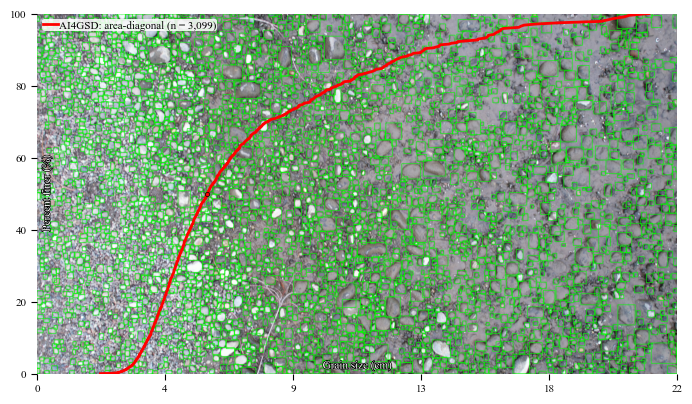

Output folder summary data to: /home/chen200/Computation/Python/work/Mine/SFA/AI4GSD/Demo_Data/20241130_YC_DroneVideoFieldTest/grains_predicts/20241130_YC_DroneVideoFieldTest_YOLO11m.1280.20250322_35/Statistics_V3_20241130_YC_DroneVideoFieldTest_YOLO11m.1280.20250322_35.csv
Total number of grains: 3169, number of grains per photo: 1584.50
Total time: 15.99 s, time per photo 8.00 s

Output all summary data to: /home/chen200/Computation/Python/work/Mine/SFA/AI4GSD/Demo_Data/20241130_YC_DroneVideoFieldTest/Statistics_V3_20241130_YC_DroneVideoFieldTest_YOLO11m.1280.20250322_35.csv
Total execution time: 16.00 s


In [7]:
PP = AI4GSD.parameters()
PP.Directory = PhotoDir
PP.ModelName = 'YOLO11m.1280.20250322'
PP.OverWriteAll = True
PP.YOLOSave = False
PP.SaveOverlayLabel = True
PP.PrintOnScreen = True 
PP.OverlayFontSize = 4
PP.OverlayLegendFontSize = 4
PP.OverlayGSDTickLineWidth = 4
gsd = AI4GSD.Photo2GSD(PP)

### 7. Applying quality control

In [8]:
gsdqc, stqc = AI4GSD.qualityControl(PhotoDir)


Quality control summary for 20241130_YC_DroneVideoFieldTest:
1/1: DJI_0113.MOV, time 240.2 s, area 14.8 m2, valid area 9.0 m2 (60.8%), frame 2, valid frame 1 (50.0%)
1/1: ***, grain number 3169, number per image 1584.5; efficiency 0.1 m2/s, 13.2 grains/s
